# Investigating the dependence of the acceleration of calculating the integral on the number of processes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

The measurements are provided by running `compute-integral` executable on the MPI cluster

In [2]:
results_path = "mpi.csv"

data = pd.read_csv(results_path)
print(data)

        parts  proc     accel
0        1000     1  0.655818
1        1000     2  0.541834
2        1000     3  0.627887
3        1000     4  0.309074
4        1000     5  0.310000
5        1000     6  0.249946
6        1000     7  0.289921
7        1000     8  0.227441
8     1000000     1  1.000090
9     1000000     2  1.976850
10    1000000     3  2.983400
11    1000000     4  3.869470
12    1000000     5  4.789020
13    1000000     6  5.608210
14    1000000     7  6.492250
15    1000000     8  6.930640
16  100000000     1  1.008340
17  100000000     2  1.987520
18  100000000     3  3.167620
19  100000000     4  5.193120
20  100000000     5  3.850840
21  100000000     6  5.838530
22  100000000     7  6.814340
23  100000000     8  7.804440


Text(0.5, 0, 'number of MPI processes')

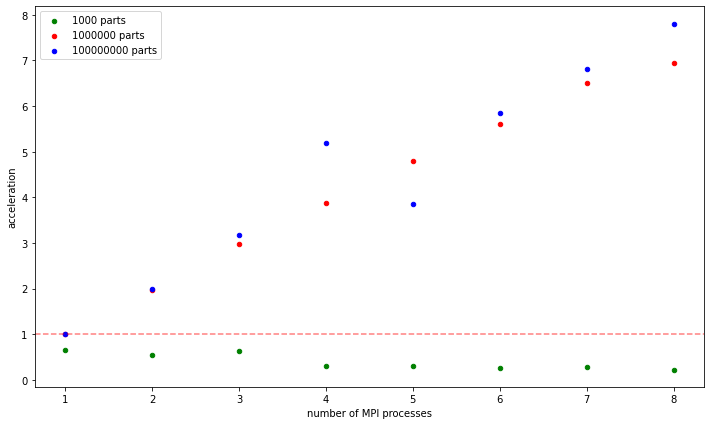

In [3]:
def plot_slice(data, n_parts, ax, color):
    data_slice = data.loc[data['parts'] == n_parts]
    data_slice.plot.scatter(x = 'proc', y = 'accel', color=color, label="{} parts".format(n_parts), ax=ax)
     
fig, ax = plt.subplots(figsize=(12, 7))

plot_slice(data, 1000, ax, 'g')
plot_slice(data, 1000000, ax, 'r')
plot_slice(data, 100000000, ax, 'b')

plt.axhline(y=1, color='r', alpha=0.5, linestyle='--')

ax.set_ylabel('acceleration')
ax.set_xlabel('number of MPI processes')

__Conclusion:__ As we can see, when number of parts in partition is small enough, the acceleration is below 1, so using MPI on small computational tasks is not reasonable. However, when number of parts is more than $1000000$, using MPI gives an acceleration multiple of the number of processes.

In [4]:
fig.savefig("report.png")